# Preparations 

In [22]:
!pip install scanpy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=5dfe900189a53891b0e1d23ff05bf13982c7731602440010146e9afbaebf221b
  Stored in directory: /root/.cache/pip/wheels/e6/3e/d2/2325892469be5cc93dbc1dbe101d0fc48b4765adfb1973b583
Successfully built session-info


In [23]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00a 0:00:01


In [24]:
'''!pip install scDeepSort-v1.0-cu102.tar.gz'''

'!pip install scDeepSort-v1.0-cu102.tar.gz'

In [25]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 12.4 MB/s eta 0:00:0000:0100:01


In [26]:
!pip install protpy
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.7/373.7 kB 16.7 MB/s eta 0:00:00


# Choose one subdataset

In [27]:
import pandas as pd
import scanpy as sc
import os

dataset="GSM8207629_pat3_pre"

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if dataset.split("_")[0] in os.path.join(dirname, filename):
            print(os.path.join(dirname, filename))

fn = '/kaggle/input/gse263932/'+dataset+'_barcodes.tsv/barcodes.tsv'
obs = pd.read_csv(fn, sep = '\t', index_col = 0, header = None)
obs.index.name = 'Barcode'
# d.columns = ['Gene Symbol']
# d = d.reset_index()
# d = d.set_index('Gene Symbol' )
display(obs)
#%%time
fn = '/kaggle/input/gse263932/'+dataset+'_features.tsv/features.tsv'
var = pd.read_csv(fn, sep = '\t', header = None, names=['Gene EnsemblID','Gene Symbol','Description'])
#var.set_index("Gene EnsemblID", drop=True, inplace=True)
#var.index.name = 'Gene EnsemblID'
#var.columns = ['Gene Symbol']
var = var.reset_index()
var = var.set_index('Gene Symbol' )
var.drop(var.columns[0], axis=1,inplace=True)
display(var)
#%%time

# Load the .mtx file using Scanpy's read_mtx function
adata = sc.read_mtx("/kaggle/input/gse263932/"+dataset+"_matrix.mtx/matrix.mtx")
adata = adata.T

# Assign the row and column index to the AnnData object
adata.var = var
adata.obs = obs
isLogged=False # flag to prevent applying log scale twice
adata


/kaggle/input/gse263932/GSM8207629_pat3_pre_barcodes.tsv/barcodes.tsv
/kaggle/input/gse263932/GSM8207629_pat3_post_samples.csv/GSM8207629_pat3_post_samples.csv
/kaggle/input/gse263932/GSM8207629_pat3_pre_matrix.mtx/matrix.mtx
/kaggle/input/gse263932/GSM8207629_pat3_pre_features.tsv/features.tsv


""
Barcode
AAACCTGAGCGTTGCC-1
AAACCTGAGCTAACAA-1
AAACCTGAGTCAATAG-1
AAACCTGAGTTTAGGA-1
AAACCTGCACGGTGTC-1
...
TTTGTCACATCGTCGG-1
TTTGTCAGTGTGCCTG-1
TTTGTCATCTGATTCT-1


,Gene EnsemblID,Description
Gene Symbol,,
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC141272.1,ENSG00000277836,Gene Expression
AC023491.2,ENSG00000278633,Gene Expression
AC007325.1,ENSG00000276017,Gene Expression


AnnData object with n_obs × n_vars = 4266 × 36601
    var: 'Gene EnsemblID', 'Description'

In [28]:
'''import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np

# Function to read a 10x dataset
def read_10x_mtx(mtx_dir):
    matrix = io.mmread(f'{mtx_dir}/matrix.mtx').tocsr()
    genes = pd.read_csv(f'{mtx_dir}/features.tsv', header=None, sep='\t')
    barcodes = pd.read_csv(f'{mtx_dir}/barcodes.tsv', header=None, sep='\t')
    # Debug prints to check the shapes
    #print(f'Matrix shape: {matrix.shape}')
    #print(f'Genes shape: {genes.shape}')
    #print(f'Barcodes shape: {barcodes.shape}')
    adata = sc.AnnData(matrix)
    adata=adata.transpose()
    adata.var['gene_ids'] = genes[0].values
    adata.var['gene_symbols'] = genes[1].values
    adata.var_names = adata.var['gene_symbols']
    adata.obs['barcodes'] = barcodes[0].values
    adata.obs_names = adata.obs['barcodes']
    return adata

# Load the first dataset
adata1 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249274_scRNA_2213_filtered_feature_bc_matrix/scRNA_2213_filtered_feature_bc_matrix/')

# Load the second dataset
adata2 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249275_scRNA_2224_filtered_feature_bc_matrix/scRNA_2224_filtered_feature_bc_matrix/')

# Load the third dataset
adata3 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249276_scRNA_2227_filtered_feature_bc_matrix/scRNA_2227_filtered_feature_bc_matrix/')

'''

"import pandas as pd\nimport scanpy as sc\nimport os\nfrom scipy import io\nimport numpy as np\n\n# Function to read a 10x dataset\ndef read_10x_mtx(mtx_dir):\n    matrix = io.mmread(f'{mtx_dir}/matrix.mtx').tocsr()\n    genes = pd.read_csv(f'{mtx_dir}/features.tsv', header=None, sep='\t')\n    barcodes = pd.read_csv(f'{mtx_dir}/barcodes.tsv', header=None, sep='\t')\n    # Debug prints to check the shapes\n    #print(f'Matrix shape: {matrix.shape}')\n    #print(f'Genes shape: {genes.shape}')\n    #print(f'Barcodes shape: {barcodes.shape}')\n    adata = sc.AnnData(matrix)\n    adata=adata.transpose()\n    adata.var['gene_ids'] = genes[0].values\n    adata.var['gene_symbols'] = genes[1].values\n    adata.var_names = adata.var['gene_symbols']\n    adata.obs['barcodes'] = barcodes[0].values\n    adata.obs_names = adata.obs['barcodes']\n    return adata\n\n# Load the first dataset\nadata1 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249274_scRNA_2213_filtered_feature_bc_matrix/scRNA_

In [29]:
'''import anndata as ad
# Combine the datasets
#adata = adata1.concatenate([adata2, adata3], batch_key='batch', batch_categories=['GSM6249274', 'GSM6249275', 'GSM6249276'])

adata1.var_names_make_unique()
adata2.var_names_make_unique()
adata3.var_names_make_unique()

adatas={'GSM6249274': adata1, 'GSM6249275': adata2, 'GSM6249276': adata3}
adata = ad.concat(adatas, label="batch")
isLogged=False # flag to prevent applying log scale twice
adata'''

'import anndata as ad\n# Combine the datasets\n#adata = adata1.concatenate([adata2, adata3], batch_key=\'batch\', batch_categories=[\'GSM6249274\', \'GSM6249275\', \'GSM6249276\'])\n\nadata1.var_names_make_unique()\nadata2.var_names_make_unique()\nadata3.var_names_make_unique()\n\nadatas={\'GSM6249274\': adata1, \'GSM6249275\': adata2, \'GSM6249276\': adata3}\nadata = ad.concat(adatas, label="batch")\nisLogged=False # flag to prevent applying log scale twice\nadata'

# In case of h5 file

In [30]:
'''import scanpy as sc
adata = sc.read_10x_h5('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')'''

"import scanpy as sc\nadata = sc.read_10x_h5('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')"

In [31]:
'''import h5py

def print_hdf5_structure(file_name):
    with h5py.File(file_name, 'r') as f:
        def print_attrs(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")

        f.visititems(print_attrs)

# Replace 'your_file.h5' with the path to your HDF5 file
print_hdf5_structure('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')

adata = sc.read_10x_h5('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')'''


'import h5py\n\ndef print_hdf5_structure(file_name):\n    with h5py.File(file_name, \'r\') as f:\n        def print_attrs(name, obj):\n            if isinstance(obj, h5py.Dataset):\n                print(f"Dataset: {name}")\n            elif isinstance(obj, h5py.Group):\n                print(f"Group: {name}")\n\n        f.visititems(print_attrs)\n\n# Replace \'your_file.h5\' with the path to your HDF5 file\nprint_hdf5_structure(\'/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5\')\n\nadata = sc.read_10x_h5(\'/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5\')'

# Preprocessing

... storing 'Description' as categorical


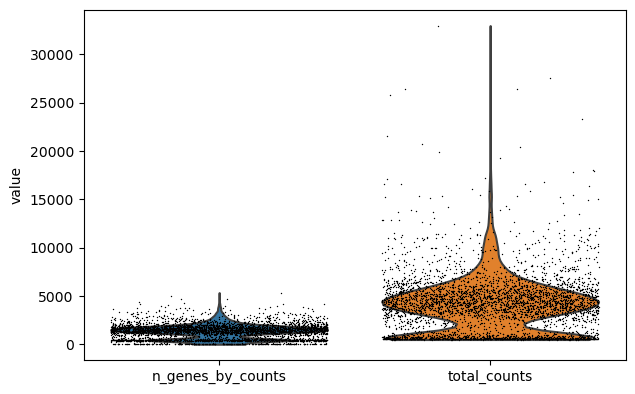

In [32]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.var_names_make_unique()
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4)

# adata.layers["counts"] is adata after filtering and normalization but before log scaling

In [33]:
!pip install --user magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.9 MB/s eta 0:00:00:00:01


In [34]:
import scanpy.external as sce

# for exporting signature matrix
sc.pp.filter_cells(data=adata, min_counts=3, inplace=True)
#sc.pp.filter_cells(data=adata, max_counts=25000, inplace=True)
sc.pp.filter_cells(data=adata, min_genes=200, inplace=True)
sc.pp.filter_cells(data=adata, max_genes=2500, inplace=True)

if(isLogged==True):
    print("Data is already logged. Did not perform scaling and transformation again.")
        
else:
    sc.pp.normalize_total(adata, target_sum=1e4)

    adata.layers["counts"]=adata.X.copy()

    sc.pp.log1p(adata)
    sce.pp.magic(adata, name_list='all_genes', knn=5)
    #
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.var_names_make_unique()
    display(adata.to_df().describe())
    isLogged=True

/root/.local/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


  Running MAGIC with `solver='exact'` on 36601-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/root/.local/lib/python3.7/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)


Gene Symbol,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
count,3824.0,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.0,...,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0
mean,0.0,0.0,0.0,0.001888,0.0,0.0,0.006628,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.002657,0.0,0.0,0.005882,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000139,0.0,0.0,0.003366,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.001156,0.0,0.0,0.005271,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.002555,0.0,0.0,0.008086,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.049539,0.0,0.0,0.083971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


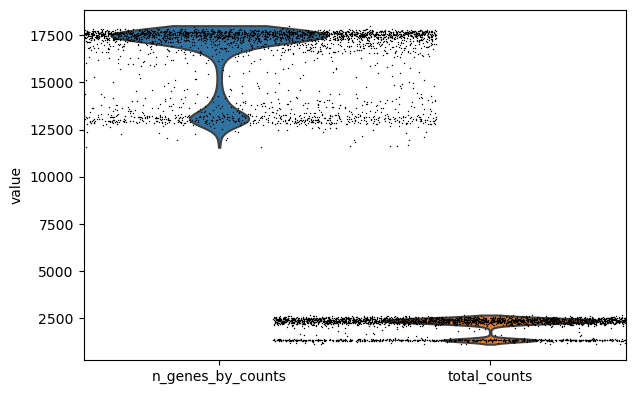

In [35]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.8)

In [36]:
print(len(set(adata.obs.index)))
adata.obs_names_make_unique()
adata.obs

3824


,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,n_genes
Barcode,,,,,,,,,,
AAACCTGAGCGTTGCC-1,17458,9.767611,2263.891357,7.725282,9.202924,16.519224,25.398133,38.800230,4403.0,1382
AAACCTGAGCTAACAA-1,17582,9.774688,2424.097412,7.793627,8.613154,15.392725,23.910888,37.044786,6284.0,1882
AAACCTGAGTCAATAG-1,12969,9.470394,1317.318604,7.184113,12.921263,21.663296,32.370512,47.352441,505.0,376
AAACCTGCACGGTGTC-1,17460,9.767725,2167.907227,7.681979,9.667679,17.291732,26.467069,39.835265,1636.0,740
AAACCTGGTCGGCATC-1,17386,9.763478,2393.771240,7.781043,8.711154,15.593582,24.170671,37.307640,2930.0,1224
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,13183,9.486759,1367.249512,7.221288,12.877959,21.702701,32.341071,47.119682,753.0,504
TTTGTCACATCGTCGG-1,17444,9.766808,2393.193604,7.780802,8.676438,15.492117,24.078205,37.277580,3535.0,1338
TTTGTCATCTGATTCT-1,17019,9.742144,2438.299561,7.799466,8.403282,15.103238,23.557293,36.721755,3993.0,1572


In [37]:
import celltypist
model = celltypist.models.Model.load(model = 'Healthy_COVID19_PBMC.pkl')
predictions=celltypist.annotate(adata, model=model, majority_voting=True)
#adata.obs_names_make_unique()
adata.obs["cell_type"]=predictions.predicted_labels["majority_voting"]


In [38]:
'''display(adata.obs.sum())'''

'display(adata.obs.sum())'

In [39]:
sc.pp.highly_variable_genes(adata)
adata.var

,Gene EnsemblID,Description,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gene Symbol,,,,,,,,,,,,
MIR1302-2HG,ENSG00000243485,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.00000,False,1.000000e-12,NaN,0.000000
FAM138A,ENSG00000237613,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.00000,False,1.000000e-12,NaN,0.000000
OR4F5,ENSG00000186092,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.00000,False,1.000000e-12,NaN,0.000000
AL627309.1,ENSG00000238009,Gene Expression,2938,0.001888,0.001887,23.169456,7.221395,2.10674,False,1.891983e-03,-5.575216,-1.235567
AL627309.3,ENSG00000239945,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.00000,False,1.000000e-12,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.00000,False,1.000000e-12,NaN,0.000000
AC023491.2,ENSG00000278633,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.00000,False,1.000000e-12,NaN,0.000000
AC007325.1,ENSG00000276017,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.00000,False,1.000000e-12,NaN,0.000000


In [40]:
adata.var[adata.var.highly_variable]

,Gene EnsemblID,Description,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gene Symbol,,,,,,,,,,,,
LINC01128,ENSG00000228794,Gene Expression,3822,0.040432,0.039636,0.052301,154.611603,5.047363,True,0.043200,-1.756290,2.870029
HES4,ENSG00000188290,Gene Expression,3809,0.020157,0.019957,0.392259,77.080956,4.357746,True,0.021227,-2.123140,2.475641
ISG15,ENSG00000187608,Gene Expression,3824,0.785788,0.579860,0.000000,3004.852539,8.008316,True,0.843911,-0.519084,1.479590
B3GALT6,ENSG00000176022,Gene Expression,3824,0.108870,0.103341,0.000000,416.317993,6.033848,True,0.109792,-3.938079,0.524463
CPTP,ENSG00000224051,Gene Expression,3824,0.078046,0.075150,0.000000,298.446411,5.701935,True,0.078858,-3.750387,0.726244
...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4,ENSG00000198886,Gene Expression,3824,2.821261,1.340580,0.000000,10788.501953,9.286329,True,2.921814,2.304980,1.238053
MT-ND5,ENSG00000198786,Gene Expression,3824,2.589439,1.277996,0.000000,9902.016602,9.200595,True,2.702996,2.342159,1.631819
MT-ND6,ENSG00000198695,Gene Expression,3824,1.372994,0.864152,0.000000,5250.329102,8.566236,True,1.556788,1.254469,1.599721


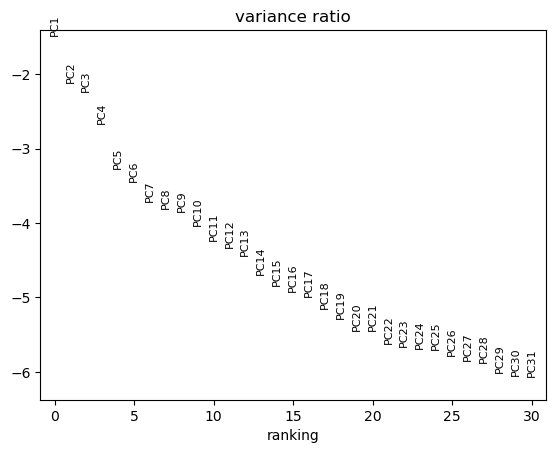

In [41]:
adata.raw=adata
adata=adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata,max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata,log=True)

In [42]:
'''counts_df=pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)'''

'counts_df=pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)'

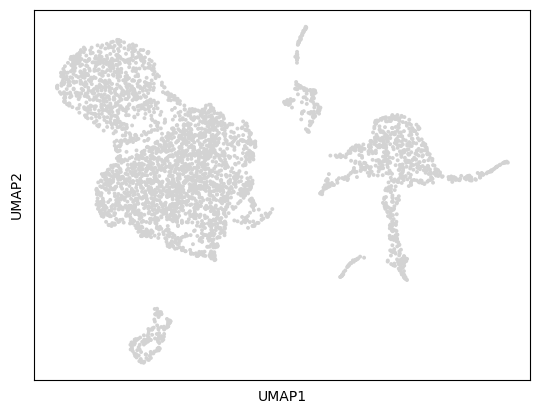

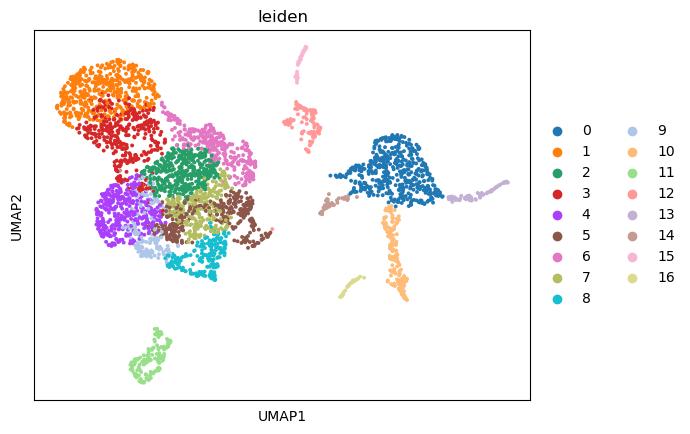

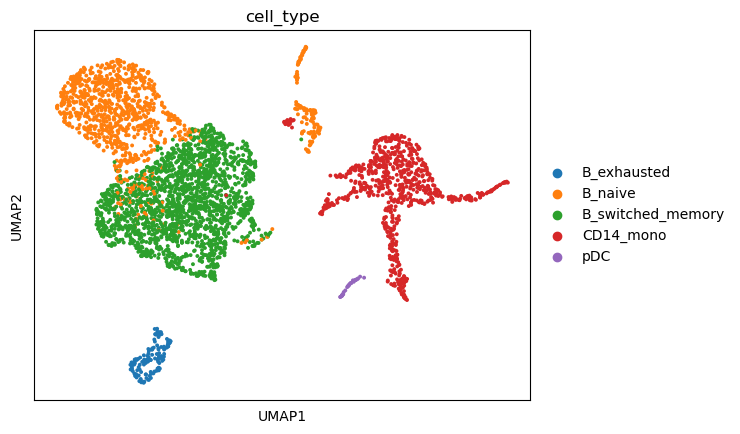

In [43]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=12)
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['cell_type'])

# If you wanna go with unsupervised clustering and not CellTypist

In [44]:
'''adata.obs["cell_type"]=adata.obs["leiden"]'''

'adata.obs["cell_type"]=adata.obs["leiden"]'

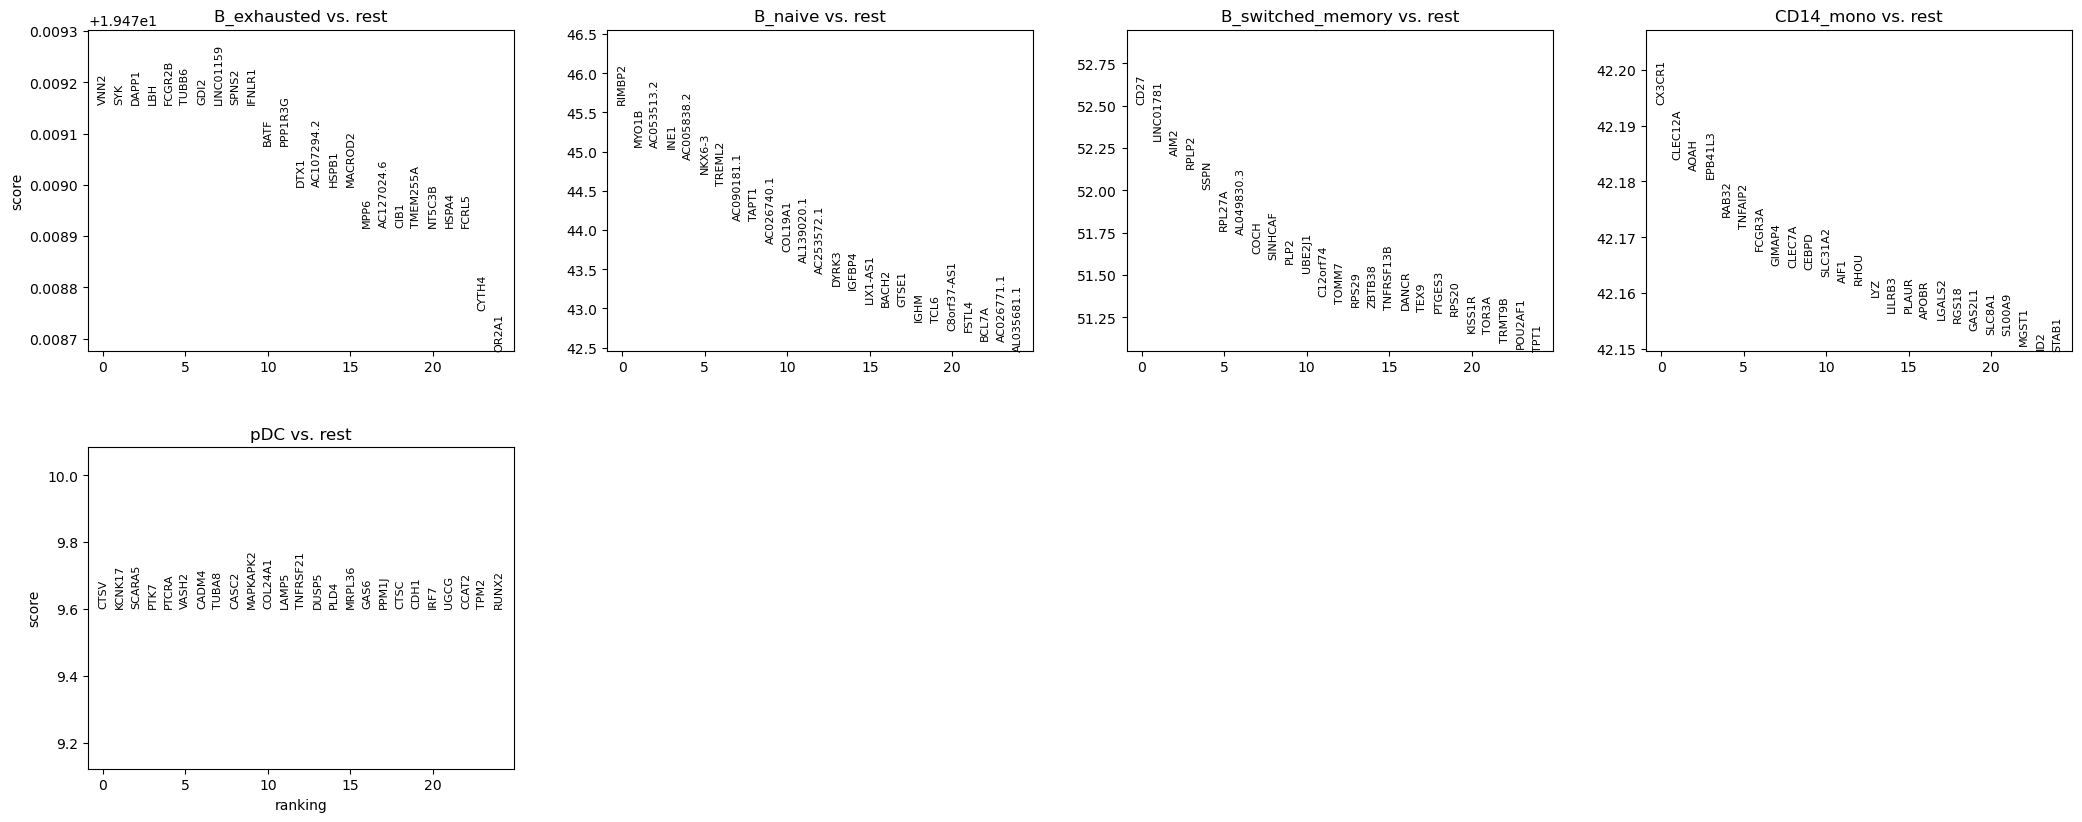

In [45]:
sc.tl.rank_genes_groups(adata, 'cell_type', method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# Define a list of proteins that are considered surface markers

In [46]:
'''cell_locations=pd.read_csv("/kaggle/input/protein-locations/subcellular_location.tsv", sep='\t', header=0)
display(cell_locations)
cell_locations = cell_locations.dropna(subset=["Main location"])
cell_locations = cell_locations[cell_locations["Main location"].str.contains("Plasma membrane")]

surf_markers=list(cell_locations["Gene name"])
surf_markers.append("CD19")
surf_markers.append("TNFRSF17")
print(surf_markers)'''

'cell_locations=pd.read_csv("/kaggle/input/protein-locations/subcellular_location.tsv", sep=\'\t\', header=0)\ndisplay(cell_locations)\ncell_locations = cell_locations.dropna(subset=["Main location"])\ncell_locations = cell_locations[cell_locations["Main location"].str.contains("Plasma membrane")]\n\nsurf_markers=list(cell_locations["Gene name"])\nsurf_markers.append("CD19")\nsurf_markers.append("TNFRSF17")\nprint(surf_markers)'

In [80]:
import pandas as pd

HPA_genes=pd.read_csv("/kaggle/input/hpa-gene-synonyms-and-protein-classes/HPA_Protein_Classes.tsv", sep='\t')
classes=HPA_genes["Protein class"].values
gene_names=HPA_genes["Gene"].values
surf_markers=[]
for idx in HPA_genes.index:
    if('Plasma proteins' in classes[idx] or 'Predicted membrane proteins' in classes[idx] or 'CD markers' in classes[idx]):
        surf_markers.append(gene_names[idx])
surf_markers.pop(surf_markers.index("SELENOI")) # This gene causes problems when fetching descriptors
surf_markers.pop(surf_markers.index("SELENOK")) # This gene causes problems when fetching descriptors
surf_markers.pop(surf_markers.index("SELENOS")) # This gene causes problems when fetching descriptors
surf_markers=list(set(surf_markers))
print(surf_markers)
display(HPA_genes)

['COA3', 'TIMM23B', 'CLTRN', 'IL10RB', 'SLC38A3', 'FN1', 'COL6A2', 'OR2G2', 'LAMP5', 'ODR4', 'TRPC1', 'FMR1NB', 'MYH7', 'GRM7', 'PLN', 'ZSCAN10', 'CHRNA7', 'PTPRS', 'RNF144A', 'BSND', 'CACNB4', 'MATN4', 'MOGS', 'NRP2', 'OR1M1', 'PLA2G6', 'OR1D5', 'LETM1', 'EFCAB14', 'TMPRSS3', 'ADRA2B', 'OST4', 'C2', 'AZU1', 'GET1-SH3BGR', 'CD53', 'DCST2', 'MIF', 'SDCBP', 'SLC13A3', 'TLR8', 'OR51A7', 'RGR', 'NFE2L1', 'FCRL3', 'ASTN1', 'SPACA6', 'STX2', 'OR52E5', 'KRTAP13-2', 'CLIP1', 'PPID', 'NDFIP1', 'MCOLN2', 'TMEM120B', 'FZD6', 'ITGA6', 'PTTG1IP', 'SLC2A4', 'GALC', 'KRT6A', 'EPSTI1', 'TMEM184A', 'OR4S1', 'OR4C3', 'ITPRIP', 'GPR176', 'PHEX', 'OR51V1', 'VAMP4', 'SCART1', 'ETNK1', 'DRAM1', 'FADS3', 'TSHR', 'ADCY2', 'MS4A15', 'AK1', 'GPR149', 'PREP', 'SLC22A14', 'E2F1', 'PCDHA2', 'MYH13', 'PCDHGC4', 'FBXL17', 'CUL4B', 'SLC34A2', 'ATP6V1G1', 'TRBC1', 'KRT72', 'PRKG1', 'RUVBL2', 'SUPT6H', 'FNDC9', 'SLC6A9', 'MAPKAPK5', 'ACSF3', 'CSAD', 'RNF215', 'KIT', 'DDX46', 'SF3A2', 'CAMP', 'CHST12', 'CRABP1', 'HSD17B

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Pathology prognostics - Lung cancer,Pathology prognostics - Melanoma,Pathology prognostics - Ovarian cancer,Pathology prognostics - Pancreatic cancer,Pathology prognostics - Prostate cancer,Pathology prognostics - Renal cancer,Pathology prognostics - Stomach cancer,Pathology prognostics - Testis cancer,Pathology prognostics - Thyroid cancer,Pathology prognostics - Urothelial cancer
0,A1BG,NaN,ENSG00000121410,Alpha-1-B glycoprotein,P04217,19,58345178-58353492,"Plasma proteins, Predicted intracellular prote...",NaN,NaN,...,unprognostic (1.09e-1),unprognostic (2.59e-1),unprognostic (2.10e-1),unprognostic (1.47e-2),unprognostic (1.37e-2),unprognostic (4.19e-5),unprognostic (2.37e-2),unprognostic (1.94e-1),unprognostic (1.72e-1),unprognostic (6.72e-2)
1,A1CF,"ACF, ACF64, ACF65, APOBEC1CF, ASP",ENSG00000148584,APOBEC1 complementation factor,Q9NQ94,10,50799409-50885675,Predicted intracellular proteins,mRNA processing,RNA-binding,...,unprognostic (7.38e-3),NaN,unprognostic (1.30e-2),unprognostic (2.46e-2),unprognostic (1.20e-1),unprognostic (1.90e-3),unprognostic (1.97e-2),unprognostic (2.77e-1),unprognostic (2.19e-2),unprognostic (8.50e-4)
2,A2M,"CPAMD5, FWP007, S863-7",ENSG00000175899,Alpha-2-macroglobulin,P01023,12,9067664-9116229,"Cancer-related genes, Candidate cardiovascular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (3.65e-2),unprognostic (2.38e-1),unprognostic (7.19e-2),unprognostic (4.71e-2),unprognostic (2.06e-2),unprognostic (1.28e-2),unprognostic (8.04e-3),unprognostic (2.32e-2),unprognostic (8.58e-2),unprognostic (9.03e-3)
3,A2ML1,"CPAMD9, FLJ25179, p170",ENSG00000166535,Alpha-2-macroglobulin like 1,A8K2U0,12,8822621-8887001,"Disease related genes, Predicted intracellular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (7.58e-3),unprognostic (2.63e-1),unprognostic (1.57e-1),unprognostic (1.15e-3),unprognostic (2.03e-1),unprognostic (1.06e-9),unprognostic (2.28e-1),unprognostic (3.07e-1),unprognostic (5.88e-2),unprognostic (2.42e-2)
4,A3GALT2,"A3GALT2P, IGB3S, IGBS3S",ENSG00000184389,"Alpha 1,3-galactosyltransferase 2",U3KPV4,1,33306766-33321098,"Enzymes, Predicted membrane proteins",Lipid metabolism,"Glycosyltransferase, Transferase",...,unprognostic (4.96e-2),unprognostic (6.83e-2),unprognostic (5.81e-2),unprognostic (1.23e-1),unprognostic (1.89e-1),unprognostic (4.90e-8),unprognostic (1.17e-1),NaN,unprognostic (1.12e-2),unprognostic (7.87e-2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20157,ZYG11A,ZYG11,ENSG00000203995,"Zyg-11 family member A, cell cycle regulator",Q6WRX3,1,52842511-52894998,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (2.34e-1),unprognostic (4.56e-2),unprognostic (2.06e-2),unprognostic (4.01e-2),unprognostic (1.01e-1),unprognostic (6.15e-3),unprognostic (2.95e-1),unprognostic (1.21e-1),unprognostic (3.07e-1),unprognostic (1.02e-1)
20158,ZYG11B,"FLJ13456, ZYG11",ENSG00000162378,"Zyg-11 family member B, cell cycle regulator",Q9C0D3,1,52726453-52827336,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (1.85e-1),unprognostic (4.84e-3),unprognostic (5.06e-2),unprognostic (2.76e-1),unprognostic (6.08e-2),prognostic favorable (9.80e-7),unprognostic (2.22e-1),unprognostic (3.37e-1),unprognostic (1.13e-1),unprognostic (9.57e-2)
20159,ZYX,NaN,ENSG00000159840,Zyxin,Q15942,7,143381295-143391111,"Plasma proteins, Predicted intracellular proteins","Cell adhesion, Host-virus interaction",NaN,...,unprognostic (1.66e-3),unprognostic (2.60e-1),unprognostic (4.22e-1),unprognostic (1.98e-1),unprognostic (2.43e-1),prognostic unfavorable (7.92e-5),unprognostic (1.39e-1),unprognostic (8.12e-2),unprognostic (1.95e-1),unprognostic (6.72e-2)
20160,ZZEF1,"FLJ10821, KIAA0399, ZZZ4",ENSG00000074755,Zinc finger ZZ-type and EF-hand domain contain...

# Histograms: Conditional Median and Weighted Median

In [48]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

# finding upregulated proteins in scRNA-seq. Lupus biomarkers adopted from https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2022.941221/full
upregProts_literature=['RSAD2', 'IFIT3', 'APOBEC3A', 'IFIT2', 'PARP9', 'DTX3L', 'PLSCR1', 'IFI35', 'ISG15', 'CMPK2', 'HERC5', 'GBP1', 'IFI27', 'STAT1', 'MX1', 'IRF7', 'OAS1', 'OAS2', 'OAS3', 'OASL', 'IFIH1', 'SIGLEC1', 'LGALS9', 'BST2']
upregProts=intersection(upregProts_literature, adata.var.index)
'''for elem in adata.var.index:
    for p in upregProts:
        if(p == elem):
            print(elem)'''
print("Disease related proteins considered:")
print(upregProts)

Disease related proteins considered:
['OASL', 'IFIT2', 'GBP1', 'IRF7', 'IFI27', 'APOBEC3A', 'DTX3L', 'SIGLEC1', 'ISG15', 'CMPK2', 'RSAD2', 'OAS3', 'LGALS9', 'IFIH1']


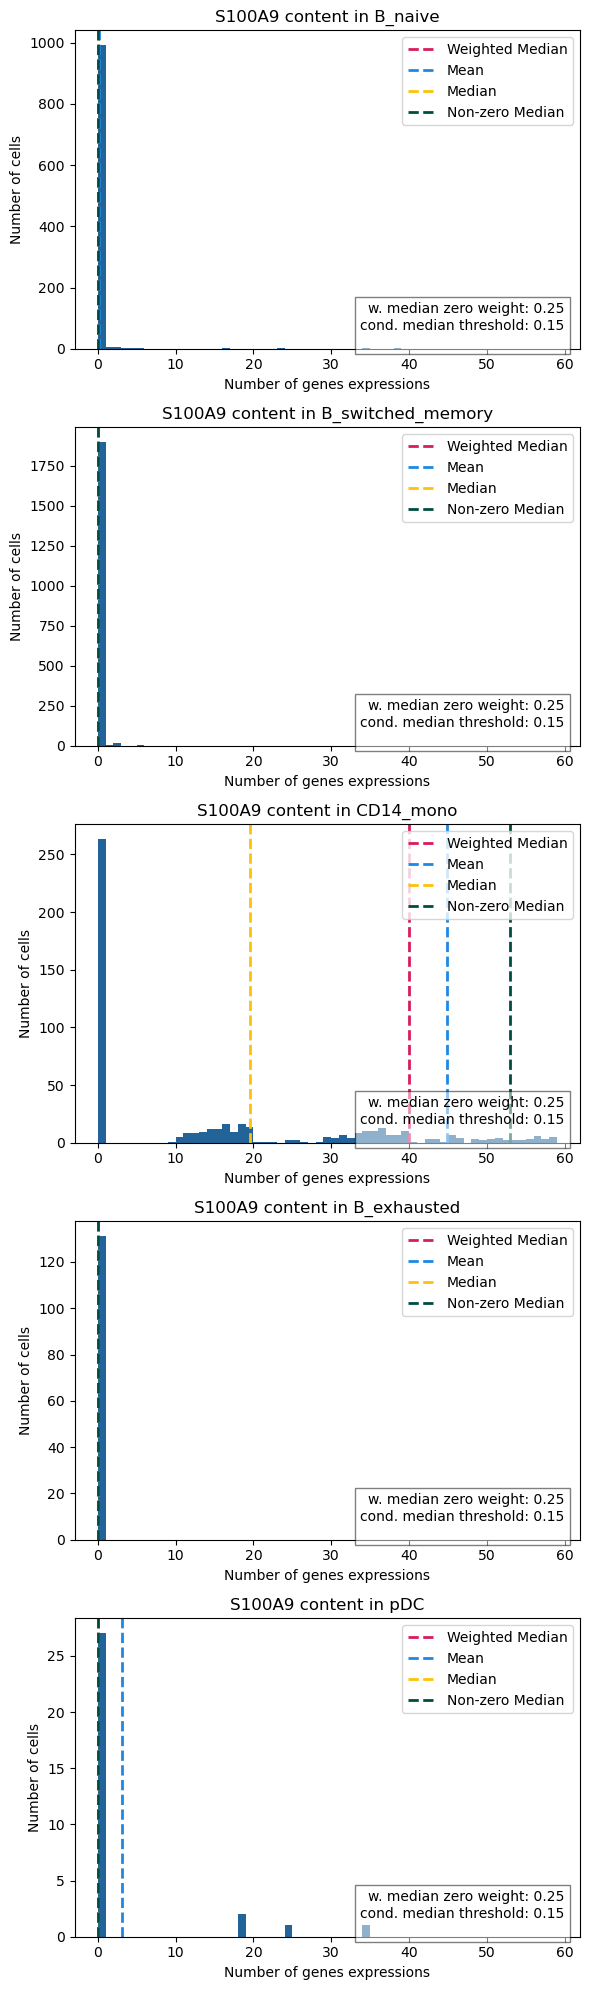

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

upregProt = "S100A9"
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)


# Uses gene counts per 10,000 cells for score calculation
cellMatrix = pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)
cellMatrix['cell_type'] = adata.obs['cell_type']
cellTypes = list(cellMatrix['cell_type'].unique())
fig, axs = plt.subplots(nrows=len(cellTypes), ncols=1, figsize=(6, 4 * len(cellTypes)))

for i, cell_t in enumerate(cellTypes):
    vals = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, upregProt]
    
    # Assign weights: give a lower weight to zero values
    weights = np.ones_like(vals)
    weights[vals == 0] = zero_weight  # Assign a weight of 0.25 to zero values
    
    axs[i].hist(vals, bins=range(0, 60), color='#226399')
    axs[i].set_title(f"{upregProt} content in {cell_t}")
    axs[i].axvline(weighted_median(vals, weights), color='#D81B60', linestyle='dashed', linewidth=2, label='Weighted Median')
    axs[i].axvline(vals.mean(), color='#1E88E5', linestyle='dashed', linewidth=2, label='Mean')
    axs[i].axvline(vals.median(), color='#FFC107', linestyle='dashed', linewidth=2, label='Median')
    non_zero_median=conditional_non_zero_median(vals, threshold=conditional_threshold)
    if not np.isnan(non_zero_median):
        axs[i].axvline(non_zero_median, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    else:
        axs[i].axvline(0, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel("Number of genes expressions")
    axs[i].set_ylabel("Number of cells")
    axs[i].text(60, 
                0, 
                f"w. median zero weight: {zero_weight:.2f}\ncond. median threshold: {conditional_threshold:.2f}\n", 
                fontsize = 10, 
                bbox = dict(facecolor = 'white', alpha = 0.5),
                horizontalalignment='right',
                verticalalignment='bottom')

plt.tight_layout()
plt.savefig("Mean and Median Modifications.png")
plt.show()


In [139]:
cellMatrix.iloc[:,0:len(cellMatrix.columns)-1]=cellMatrix.iloc[:,0:len(cellMatrix.columns)-1].clip(0)
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,CEP104,...,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC004556.3,AC233755.1,cell_type
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,0.0,0.000000,0.156196,0.040078,0.000000,0.405402,0.001138,0.000000,0.000000,0.000000,...,0.540646,0.167844,0.115606,0.210844,0.377173,0.018480,0.000000,0.396373,0.000000,B_naive
AAACCTGAGCTAACAA-1,0.0,0.072086,0.000000,0.000000,1.492137,0.027471,0.000000,0.700002,0.159660,0.277053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078943,0.000000,0.000000,B_switched_memory
AAACCTGAGTCAATAG-1,0.0,0.000000,0.502408,0.000000,0.000000,0.000000,0.000000,0.577153,0.224533,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CD14_mono
AAACCTGCACGGTGTC-1,0.0,0.000000,0.000000,0.774414,0.000000,0.054297,0.000000,0.000000,0.000000,0.000000,...,0.180651,0.252477,0.438590,0.623311,0.329656,0.180418,0.763591,3.010761,0.020039,B_switched_memory
AAACCTGGTCGGCATC-1,0.0,0.000000,0.000000,0.000000,1.186606,0.681624,0.673919,2.239377,0.831901,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125453,0.000000,0.000000,B_switched_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,0.0,0.000000,0.443675,0.711672,0.867810,0.115749,0.000000,0.000000,0.000000,0.250697,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CD14_mono
TTTGTCACATCGTCGG-1,0.0,0.011867,0.000000,0.000000,0.392997,0.000000,0.634166,0.000000,0.000000,0.000000,...,0.480839,0.000000,0.000000,0.000000,0.000000,0.077006,0.094095,0.000000,0.020705,B_switched_memory
TTTGTCATCTGATTCT-1,0.0,0.060268,0.392328,0.000000,0.000000,0.000000,1.729039,0.000000,0.725233,0.000000,...,1.038474,0.156225,0.180556,0.000000,0.000000,0.312782,0.323474,1.364564,0.000000,B_naive


In [81]:
'''zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

for CT in cellTypes:
    means=[]
    medians=[]
    w_medians=[]
    c_medians=[]
    temp_cellMatrix=cellMatrix.loc[cellMatrix['cell_type']==CT,:].copy()
    temp_cellMatrix.drop("cell_type", inplace=True, axis=1)
    for gene in temp_cellMatrix.columns:
        print(CT+">>"+gene)
        # Assign weights: give a lower weight to zero values
        weights = np.ones_like(temp_cellMatrix[gene])
        weights[temp_cellMatrix[gene] == 0] = zero_weight  # Assign a weight of 0.25 to zero values
        means.append(temp_cellMatrix[gene].mean())
        medians.append(temp_cellMatrix[gene].median())
        w_medians.append(weighted_median(temp_cellMatrix[gene], weights))
        non_zero_median=conditional_non_zero_median(temp_cellMatrix[gene], threshold=conditional_threshold)
        if not np.isnan(non_zero_median):
            c_medians.append(non_zero_median)
        else:
            c_medians.append(0)
    results=pd.DataFrame({"Mean": means, "Median": medians, "W_Medians": w_medians, "C_Medians": c_medians}, index=temp_cellMatrix.columns)
    results.to_excel(CT+"_stats.xlsx")
    display(results.describe())
    
import zipfile
import os

zipfile_name="Cell_Type_Stats.zip"
directory = "/kaggle/working/"  # The directory to search in

# Find the files that contain the search string
files_to_zip = [f for f in os.listdir(directory) if "_stats" in f and not "zip" in f]

# Create the zip file and add the filtered files
with zipfile.ZipFile(zipfile_name, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), arcname=file)
'''

B_naive>>LINC01128
B_naive>>HES4
B_naive>>ISG15
B_naive>>B3GALT6
B_naive>>CPTP
B_naive>>MIB2
B_naive>>CDK11B
B_naive>>SLC35E2B
B_naive>>CDK11A
B_naive>>CEP104
B_naive>>ACOT7
B_naive>>TNFRSF25
B_naive>>CAMTA1
B_naive>>VAMP3
B_naive>>PIK3CD
B_naive>>CTNNBIP1
B_naive>>LZIC
B_naive>>RBP7
B_naive>>PGD
B_naive>>TARDBP
B_naive>>SRM
B_naive>>EXOSC10
B_naive>>MTOR
B_naive>>UBIAD1
B_naive>>FBXO44
B_naive>>AGTRAP
B_naive>>CLCN6
B_naive>>TNFRSF1B
B_naive>>VPS13D
B_naive>>PRDM2
B_naive>>EFHD2
B_naive>>PLEKHM2
B_naive>>SZRD1
B_naive>>NBPF1
B_naive>>BX284668.5
B_naive>>UBR4
B_naive>>CDA
B_naive>>EIF4G3
B_naive>>ECE1
B_naive>>USP48
B_naive>>ZBTB40
B_naive>>C1QA
B_naive>>C1QB
B_naive>>ID3
B_naive>>PITHD1
B_naive>>LYPLA2
B_naive>>CNR2
B_naive>>IFNLR1
B_naive>>CLIC4
B_naive>>MACO1
B_naive>>STMN1
B_naive>>SH3BGRL3
B_naive>>UBXN11
B_naive>>NUDC
B_naive>>TMEM222
B_naive>>FGR
B_naive>>IFI6
B_naive>>FAM76A
B_naive>>STX12
B_naive>>THEMIS2
B_naive>>RPA2
B_naive>>PTAFR
B_naive>>PHACTR4
B_naive>>SNHG3
B_naive>>SN

,Mean,Median,W_Medians,C_Medians
count,4286.000000,4286.000000,4286.000000,4286.000000
mean,0.069272,-0.068511,-0.068511,0.599060
std,0.519990,0.532055,0.532055,0.385675
min,-1.339500,-1.688134,-1.688134,0.000000
25%,-0.336657,-0.389874,-0.389874,0.391593
50%,0.085271,-0.126976,-0.126976,0.553750
75%,0.436776,0.232134,0.232134,0.743112
max,1.407904,1.654847,1.654847,3.543561


B_switched_memory>>LINC01128
B_switched_memory>>HES4
B_switched_memory>>ISG15
B_switched_memory>>B3GALT6
B_switched_memory>>CPTP
B_switched_memory>>MIB2
B_switched_memory>>CDK11B
B_switched_memory>>SLC35E2B
B_switched_memory>>CDK11A
B_switched_memory>>CEP104
B_switched_memory>>ACOT7
B_switched_memory>>TNFRSF25
B_switched_memory>>CAMTA1
B_switched_memory>>VAMP3
B_switched_memory>>PIK3CD
B_switched_memory>>CTNNBIP1
B_switched_memory>>LZIC
B_switched_memory>>RBP7
B_switched_memory>>PGD
B_switched_memory>>TARDBP
B_switched_memory>>SRM
B_switched_memory>>EXOSC10
B_switched_memory>>MTOR
B_switched_memory>>UBIAD1
B_switched_memory>>FBXO44
B_switched_memory>>AGTRAP
B_switched_memory>>CLCN6
B_switched_memory>>TNFRSF1B
B_switched_memory>>VPS13D
B_switched_memory>>PRDM2
B_switched_memory>>EFHD2
B_switched_memory>>PLEKHM2
B_switched_memory>>SZRD1
B_switched_memory>>NBPF1
B_switched_memory>>BX284668.5
B_switched_memory>>UBR4
B_switched_memory>>CDA
B_switched_memory>>EIF4G3
B_switched_memory>>ECE1
B

,Mean,Median,W_Medians,C_Medians
count,4286.000000,4286.000000,4286.000000,4286.000000
mean,-0.012851,-0.065208,-0.065585,0.422049
std,0.240205,0.245154,0.245117,0.180701
min,-0.706897,-0.754284,-0.754319,0.000000
25%,-0.158717,-0.219926,-0.220233,0.300881
50%,-0.004409,-0.057928,-0.058185,0.422107
75%,0.129212,0.075664,0.074880,0.547789
max,0.709804,0.815207,0.814944,2.224809


CD14_mono>>LINC01128
CD14_mono>>HES4
CD14_mono>>ISG15
CD14_mono>>B3GALT6
CD14_mono>>CPTP
CD14_mono>>MIB2
CD14_mono>>CDK11B
CD14_mono>>SLC35E2B
CD14_mono>>CDK11A
CD14_mono>>CEP104
CD14_mono>>ACOT7
CD14_mono>>TNFRSF25
CD14_mono>>CAMTA1
CD14_mono>>VAMP3
CD14_mono>>PIK3CD
CD14_mono>>CTNNBIP1
CD14_mono>>LZIC
CD14_mono>>RBP7
CD14_mono>>PGD
CD14_mono>>TARDBP
CD14_mono>>SRM
CD14_mono>>EXOSC10
CD14_mono>>MTOR
CD14_mono>>UBIAD1
CD14_mono>>FBXO44
CD14_mono>>AGTRAP
CD14_mono>>CLCN6
CD14_mono>>TNFRSF1B
CD14_mono>>VPS13D
CD14_mono>>PRDM2
CD14_mono>>EFHD2
CD14_mono>>PLEKHM2
CD14_mono>>SZRD1
CD14_mono>>NBPF1
CD14_mono>>BX284668.5
CD14_mono>>UBR4
CD14_mono>>CDA
CD14_mono>>EIF4G3
CD14_mono>>ECE1
CD14_mono>>USP48
CD14_mono>>ZBTB40
CD14_mono>>C1QA
CD14_mono>>C1QB
CD14_mono>>ID3
CD14_mono>>PITHD1
CD14_mono>>LYPLA2
CD14_mono>>CNR2
CD14_mono>>IFNLR1
CD14_mono>>CLIC4
CD14_mono>>MACO1
CD14_mono>>STMN1
CD14_mono>>SH3BGRL3
CD14_mono>>UBXN11
CD14_mono>>NUDC
CD14_mono>>TMEM222
CD14_mono>>FGR
CD14_mono>>IFI6
CD14_m

,Mean,Median,W_Medians,C_Medians
count,4286.000000,4286.000000,4286.000000,4286.000000
mean,-0.070907,-0.197710,-0.197710,0.427134
std,0.320320,0.380661,0.380661,0.374844
min,-0.747959,-0.933952,-0.933952,0.000000
25%,-0.301356,-0.456611,-0.456611,0.000000
50%,-0.139902,-0.274071,-0.274071,0.394798
75%,0.079105,-0.051248,-0.051248,0.616675
max,0.831904,1.261550,1.261550,3.087862


B_exhausted>>LINC01128
B_exhausted>>HES4
B_exhausted>>ISG15
B_exhausted>>B3GALT6
B_exhausted>>CPTP
B_exhausted>>MIB2
B_exhausted>>CDK11B
B_exhausted>>SLC35E2B
B_exhausted>>CDK11A
B_exhausted>>CEP104
B_exhausted>>ACOT7
B_exhausted>>TNFRSF25
B_exhausted>>CAMTA1
B_exhausted>>VAMP3
B_exhausted>>PIK3CD
B_exhausted>>CTNNBIP1
B_exhausted>>LZIC
B_exhausted>>RBP7
B_exhausted>>PGD
B_exhausted>>TARDBP
B_exhausted>>SRM
B_exhausted>>EXOSC10
B_exhausted>>MTOR
B_exhausted>>UBIAD1
B_exhausted>>FBXO44
B_exhausted>>AGTRAP
B_exhausted>>CLCN6
B_exhausted>>TNFRSF1B
B_exhausted>>VPS13D
B_exhausted>>PRDM2
B_exhausted>>EFHD2
B_exhausted>>PLEKHM2
B_exhausted>>SZRD1
B_exhausted>>NBPF1
B_exhausted>>BX284668.5
B_exhausted>>UBR4
B_exhausted>>CDA
B_exhausted>>EIF4G3
B_exhausted>>ECE1
B_exhausted>>USP48
B_exhausted>>ZBTB40
B_exhausted>>C1QA
B_exhausted>>C1QB
B_exhausted>>ID3
B_exhausted>>PITHD1
B_exhausted>>LYPLA2
B_exhausted>>CNR2
B_exhausted>>IFNLR1
B_exhausted>>CLIC4
B_exhausted>>MACO1
B_exhausted>>STMN1
B_exhaus

,Mean,Median,W_Medians,C_Medians
count,4286.000000,4286.000000,4286.000000,4286.000000
mean,0.059435,0.022721,0.022721,0.813176
std,1.639672,1.699569,1.699569,1.085597
min,-4.367192,-4.597583,-4.597583,0.000000
25%,-1.044212,-1.121548,-1.121548,0.000000
50%,-0.043014,-0.095616,-0.095616,0.443756
75%,0.913885,0.888732,0.888732,1.095855
max,5.097553,5.436850,5.436850,5.436850


pDC>>LINC01128
pDC>>HES4
pDC>>ISG15
pDC>>B3GALT6
pDC>>CPTP
pDC>>MIB2
pDC>>CDK11B
pDC>>SLC35E2B
pDC>>CDK11A
pDC>>CEP104
pDC>>ACOT7
pDC>>TNFRSF25
pDC>>CAMTA1
pDC>>VAMP3
pDC>>PIK3CD
pDC>>CTNNBIP1
pDC>>LZIC
pDC>>RBP7
pDC>>PGD
pDC>>TARDBP
pDC>>SRM
pDC>>EXOSC10
pDC>>MTOR
pDC>>UBIAD1
pDC>>FBXO44
pDC>>AGTRAP
pDC>>CLCN6
pDC>>TNFRSF1B
pDC>>VPS13D
pDC>>PRDM2
pDC>>EFHD2
pDC>>PLEKHM2
pDC>>SZRD1
pDC>>NBPF1
pDC>>BX284668.5
pDC>>UBR4
pDC>>CDA
pDC>>EIF4G3
pDC>>ECE1
pDC>>USP48
pDC>>ZBTB40
pDC>>C1QA
pDC>>C1QB
pDC>>ID3
pDC>>PITHD1
pDC>>LYPLA2
pDC>>CNR2
pDC>>IFNLR1
pDC>>CLIC4
pDC>>MACO1
pDC>>STMN1
pDC>>SH3BGRL3
pDC>>UBXN11
pDC>>NUDC
pDC>>TMEM222
pDC>>FGR
pDC>>IFI6
pDC>>FAM76A
pDC>>STX12
pDC>>THEMIS2
pDC>>RPA2
pDC>>PTAFR
pDC>>PHACTR4
pDC>>SNHG3
pDC>>SNHG12
pDC>>TAF12
pDC>>YTHDF2
pDC>>AL137857.1
pDC>>LAPTM5
pDC>>PUM1
pDC>>SNRNP40
pDC>>LCK
pDC>>MARCKSL1
pDC>>BSDC1
pDC>>ZBTB8OS
pDC>>SYNC
pDC>>S100PBP
pDC>>RNF19B
pDC>>AK2
pDC>>TMEM35B
pDC>>ZMYM6
pDC>>ZMYM4
pDC>>PSMB2
pDC>>AGO1
pDC>>AGO3
pDC>>MAP7D1
pDC>>CSF3R
p

,Mean,Median,W_Medians,C_Medians
count,4286.000000,4286.000000,4286.000000,4286.000000
mean,-0.039059,-0.080067,-0.080067,0.730399
std,1.977847,2.095778,2.095778,1.585291
min,-4.518688,-4.902441,-4.902441,0.000000
25%,-1.169405,-1.269359,-1.269359,0.000000
50%,-0.490789,-0.540246,-0.540246,0.000000
75%,0.627869,0.612058,0.612058,0.700215
max,9.403551,10.000000,10.000000,10.000000


In [82]:
from Bio import SeqIO
import protpy as protpy
import numpy as np

def get_fasta(geneList):
    gene_to_seq = {}
    sequences=[]
    geneList=list(geneList)
    successfulGenes=[]

    for record in SeqIO.parse("/kaggle/input/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"):
        org=record.name.split("|")[2].split("_")[1]
        try:
            gene=record.description.split("GN=")[1].split(" ")[0]
        except Exception as e:
            print(e)
            gene=record.name.split("|")[2].split("_")[0]
        if(org == "HUMAN" and gene in geneList):
            gene_to_seq[gene]=record.seq
            #print(gene_to_seq)
    for gene in geneList:
        try:
            new_seq=gene_to_seq[gene]
            sequences.append(new_seq)
            successfulGenes.append(gene)
        except Exception as e:
            print(e)
    return sequences, successfulGenes

prots=[g for g in surf_markers if g in list(adata.var_names)]
seqs, genes_found=get_fasta(prots) # use genes in common between surface markers and dataset
desc_lookup=pd.DataFrame({"Gene": genes_found, "FASTA": seqs})
descList=[]
for i, seq in enumerate(seqs):
    #try:
    descList.append(protpy.dipeptide_composition(str(seq)))
    #except:
        #print("Error with gene "+genes_found[i]+" sequence "+seq)
desc_lookup=desc_lookup.join(pd.DataFrame(np.squeeze(descList)))
desc_lookup.drop("FASTA", inplace=True, axis=1)
desc_lookup.set_index("Gene", inplace=True)

#desc_lookup.drop_duplicates(subset='Gene', inplace=True, axis=0)
display(desc_lookup)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Gene,,,,,,,,,,,,,,,,,,,,,
RNF144A,1.03,0.69,0.00,0.34,0.69,0.34,0.00,0.34,0.00,0.34,...,0.00,0.00,0.34,0.00,0.34,0.00,0.00,0.34,0.00,0.00
EFCAB14,0.61,0.40,0.40,0.00,0.20,0.20,0.00,0.00,0.20,1.62,...,0.00,0.00,0.20,0.40,0.00,0.20,0.00,0.00,0.00,0.00
SDCBP,0.34,0.00,0.34,0.34,1.01,0.34,0.34,0.34,0.00,0.00,...,0.67,0.00,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NFE2L1,0.13,0.00,0.52,0.39,0.00,0.52,0.00,0.13,0.00,1.04,...,0.00,0.13,0.00,0.52,0.00,0.78,0.13,0.00,0.00,0.00
FCRL3,0.55,0.00,0.41,0.27,0.14,0.41,0.41,0.00,0.00,0.41,...,0.00,0.14,0.00,0.14,0.27,0.68,0.00,0.00,0.41,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD40,0.36,0.72,0.00,0.00,0.36,0.36,0.00,0.36,0.36,0.36,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CCR2,0.27,0.00,0.00,0.00,0.27,0.00,0.27,0.54,0.00,0.54,...,0.00,0.27,0.00,0.00,0.00,0.54,0.00,0.27,0.00,0.00
SRP54,0.40,0.20,0.60,0.00,0.40,0.60,0.00,0.40,0.99,0.80,...,0.00,0.00,0.00,0.20,0.00,0.00,0.40,0.20,0.00,0.20


In [61]:
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,CEP104,...,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC004556.3,AC233755.1,cell_type
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,0.0,0.0,9.084715,0.0,0.000000,0.0,2.271179,0.000000,0.000000,0.0,...,0.000000,27.254145,18.169430,15.898251,43.152397,18.169430,6.813536,0.0,0.0,B_naive
AAACCTGAGCTAACAA-1,0.0,0.0,1.591343,0.0,1.591343,0.0,0.000000,3.182686,0.000000,0.0,...,0.000000,12.730744,23.870146,11.139401,17.504774,20.687460,30.235518,0.0,0.0,B_switched_memory
AAACCTGAGTCAATAG-1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,19.801979,19.801979,0.000000,0.000000,0.000000,0.000000,0.0,0.0,CD14_mono
AAACCTGCACGGTGTC-1,0.0,0.0,6.112470,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,36.674820,61.124695,79.462105,42.787289,12.224939,79.462105,0.0,0.0,B_switched_memory
AAACCTGGTCGGCATC-1,0.0,0.0,0.000000,0.0,3.412969,0.0,0.000000,3.412969,0.000000,0.0,...,0.000000,34.129692,17.064846,27.303753,20.477814,17.064846,20.477814,0.0,0.0,B_switched_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,0.0,0.0,13.280212,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,13.280212,13.280212,0.000000,13.280212,0.000000,0.0,0.0,CD14_mono
TTTGTCACATCGTCGG-1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,2.828854,25.459688,14.144272,8.486563,11.315417,25.459688,2.828854,0.0,0.0,B_switched_memory
TTTGTCATCTGATTCT-1,0.0,0.0,2.504383,0.0,0.000000,0.0,0.000000,2.504383,0.000000,0.0,...,0.000000,17.530678,20.035061,25.043827,10.017530,25.043827,12.521914,0.0,0.0,B_naive


In [76]:
len(medianList[0].index)

1707

In [140]:
import pickle

model='ridge'

def get_abundances(transcripts_per_gene, model='ridge'): # takes a dataframe where indicies are gene names and one column (transcripts)
    X_desc=desc_lookup.copy()
    X_desc=X_desc.mul(transcripts_per_gene, axis=0)
    transcripts_per_gene=transcripts_per_gene.to_frame()
    X=transcripts_per_gene.join(X_desc, how='inner') # based on index
    if(model=='ridge'):
        model_file = open("/kaggle/input/protein_abundance_predictor/scikitlearn/ridge/2/Ridge_Protein_Abundance_Predictor.sav",'rb') # Ridge
    else:
        model_file = open("/kaggle/input/protein_abundance_predictor/scikitlearn/default/1/Protein_Abundance_Predictor.sav",'rb') # Random Forest
    model = pickle.load(model_file)
    model_file.close()
    y=model.predict(X)
    return y

cellMatrix = adata.to_df()
cellMatrix_surf = cellMatrix.loc[:, genes_found].copy() # only keep genes found in fasta and surf_markers
cellMatrix_surf['cell_type'] = adata.obs['cell_type']
cellMatrix['cell_type'] = adata.obs['cell_type']

medianList=[]
for cell_t in cellTypes:
    #temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    medianList.append(cellMatrix_surf.loc[cellMatrix_surf['cell_type']==cell_t].median()) # averaging uses conditional non zero median of cell counts
    #sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
#averagedMatrix.index=cellTypes
medianDf=pd.DataFrame(medianList, columns=cellMatrix_surf.columns, index=cellTypes)
medianDf=medianDf.clip(0)
#medianDf["cell_type"]=cellTypes
medianDf.drop("cell_type", inplace=True, axis=1)
medianDf=medianDf.T

abundanceMatrix=[]
abundanceMatrix_trueZero=[]

for cell_t in cellTypes:
    transcripts_col=medianDf[cell_t].rename("Transcripts")
    abund_row=get_abundances(transcripts_col, model)
    abund_row_trueZero=abund_row.copy()
    abund_row_trueZero[transcripts_col==0]=0
    abundanceMatrix.append(abund_row)
    abundanceMatrix_trueZero.append(abund_row_trueZero)
    
abundanceMatrix=pd.DataFrame(abundanceMatrix, index=cellTypes, columns=genes_found)
abundanceMatrix_trueZero=pd.DataFrame(abundanceMatrix_trueZero, index=cellTypes, columns=genes_found)
abundanceMatrix.clip(0,inplace=True)
abundanceMatrix_trueZero.clip(0,inplace=True)
display(abundanceMatrix)
display(abundanceMatrix_trueZero)

,RNF144A,EFCAB14,SDCBP,NFE2L1,FCRL3,CLIP1,PPID,NDFIP1,MCOLN2,ITGA6,...,SLC2A6,FKBP3,STX17,STX16,ACSF2,CD40,CCR2,SRP54,UBR4,EMC4
B_naive,0.000000,0.142491,0.000000,0.000000,0.798041,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.956241,0.000000,4.960160,0.000000,0.000000,0.000000,0.000000
B_switched_memory,0.000000,0.000000,0.000000,0.187938,0.000000,0.144326,0.038024,0.312709,0.663829,0.015232,...,1.096257,0.000000,0.58347,0.000000,1.572927,0.294874,0.000000,0.633023,0.000000,0.822056
CD14_mono,0.000000,0.000000,1.481434,0.000000,0.000000,0.150290,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066201,0.00000,0.000000,0.000000,0.000000,1.014276,0.000000,0.000000,0.615725
B_exhausted,6.021417,0.486923,4.349444,0.148978,16.228689,6.504265,2.371393,0.890937,0.000000,2.069991,...,0.000000,6.405178,0.00000,0.611053,1.117609,0.000000,0.000000,0.000000,13.212907,0.000000
pDC,0.000000,9.771199,0.000000,0.000000,0.000000,0.000000,17.013746,0.000000,0.000000,0.000000,...,24.205662,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.347338,6.868585,0.715023


,RNF144A,EFCAB14,SDCBP,NFE2L1,FCRL3,CLIP1,PPID,NDFIP1,MCOLN2,ITGA6,...,SLC2A6,FKBP3,STX17,STX16,ACSF2,CD40,CCR2,SRP54,UBR4,EMC4
B_naive,0.000000,0.142491,0.000000,0.000000,0.798041,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.956241,0.000000,4.960160,0.000000,0.000000,0.000000,0.000000
B_switched_memory,0.000000,0.000000,0.000000,0.187938,0.000000,0.144326,0.038024,0.312709,0.663829,0.015232,...,1.096257,0.000000,0.58347,0.000000,1.572927,0.294874,0.000000,0.633023,0.000000,0.822056
CD14_mono,0.000000,0.000000,1.481434,0.000000,0.000000,0.150290,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066201,0.00000,0.000000,0.000000,0.000000,1.014276,0.000000,0.000000,0.615725
B_exhausted,6.021417,0.486923,4.349444,0.148978,16.228689,6.504265,2.371393,0.890937,0.000000,2.069991,...,0.000000,6.405178,0.00000,0.611053,1.117609,0.000000,0.000000,0.000000,13.212907,0.000000
pDC,0.000000,9.771199,0.000000,0.000000,0.000000,0.000000,17.013746,0.000000,0.000000,0.000000,...,24.205662,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.347338,6.868585,0.715023


# Heatmap

In [ ]:
averagedMatrix

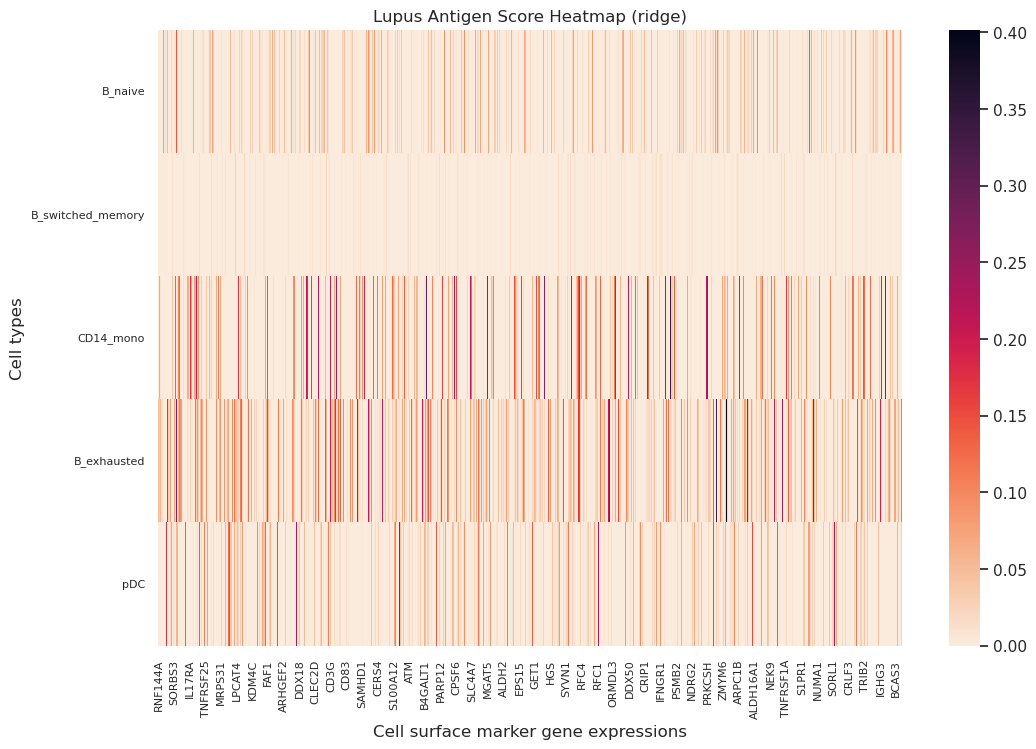

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

averagedMatrix=[]
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix.append(cellMatrix.loc[cellMatrix['cell_type']==cell_t].median())
    sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix=pd.DataFrame(averagedMatrix)
averagedMatrix.index=cellTypes
averagedMatrix.clip(0, inplace=True)
sums=sums/sum(sums)
#display(averagedMatrix['FGR'])
#upregProts_effective=averagedMatrix.loc[:,upregProts].sum(axis=1, numeric_only=True)/len(upregProts)
upregProts_effective=averagedMatrix.loc[:,upregProts].mean(axis=1)
#print(upregProts_effective)
#scoreMatrix=abundanceMatrix.copy()
scoreMatrix=abundanceMatrix.mul(upregProts_effective, axis=0) # multiply by upregulated protein presence in each cell type
scoreMatrix=scoreMatrix.mul(sums, axis=0)
#scoreMatrix=scoreMatrix[genes_found]
#display(abundanceMatrix)
#display(scoreMatrix)
# Filter averagedMatrix to keep only columns that are in surf_markers
#abundanceMatrix = averagedMatrix.loc[:, averagedMatrix.columns.isin(surf_markers)].copy()

#display(markers_averagedMatrix)
sns.set_theme(style="whitegrid", palette="pastel")
fig,ax=plt.subplots(figsize=(12,8))
#norm=LogNorm(vmin=1/10000, vmax=10)
scoreMatrix=scoreMatrix.dropna(axis=1, how='all')
sns_plot=sns.heatmap(scoreMatrix,ax=ax,cmap='rocket_r')

ax.set_title(f"Lupus Antigen Score Heatmap ({model})")
ax.set(xlabel='Cell surface marker gene expressions', ylabel='Cell types')
#ax.set_xticks(range(len(nonzero_markers_averagedMatrix.columns))) 

#ax.set_xticklabels(nonzero_markers_averagedMatrix.columns) 
sns_plot.tick_params(labelsize=8)
fig.savefig(dataset+f"_heatmap ({model}).png", bbox_inches='tight')

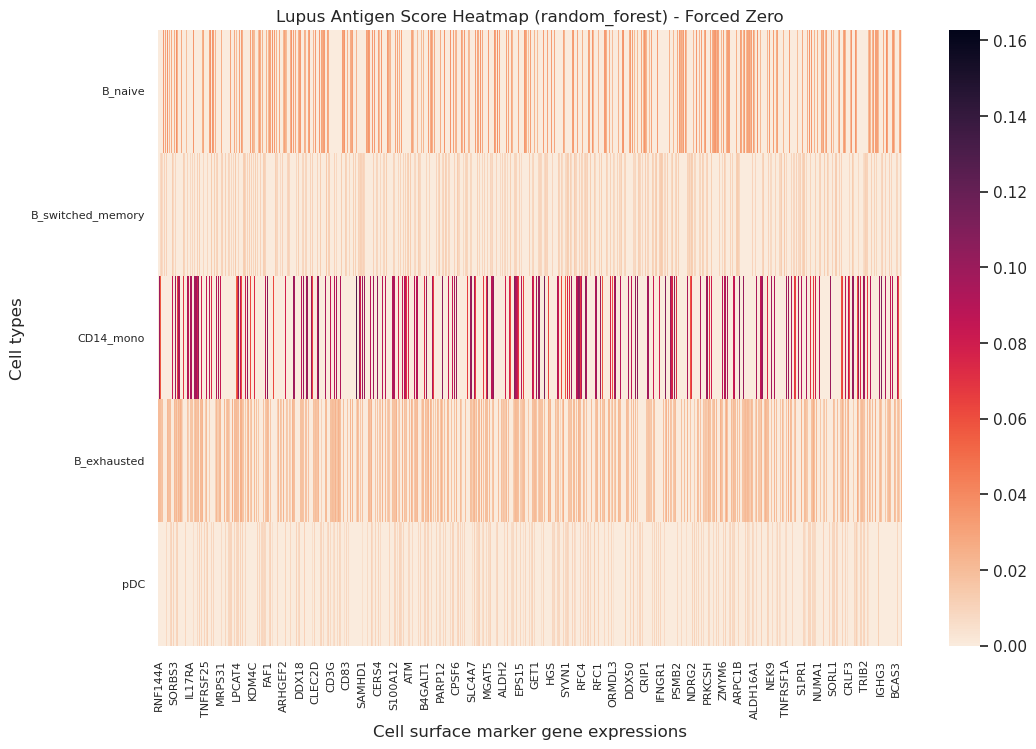

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

averagedMatrix=[]
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix.append(cellMatrix.loc[cellMatrix['cell_type']==cell_t].median())
    sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix=pd.DataFrame(averagedMatrix)
averagedMatrix.index=cellTypes
averagedMatrix.clip(0, inplace=True)
sums=sums/sum(sums)
#display(averagedMatrix['FGR'])
#upregProts_effective=averagedMatrix.loc[:,upregProts].sum(axis=1, numeric_only=True)/len(upregProts)
upregProts_effective=averagedMatrix.loc[:,upregProts].mean(axis=1)
#print(upregProts_effective)
#scoreMatrix=abundanceMatrix.copy()
scoreMatrix=abundanceMatrix_trueZero.mul(upregProts_effective, axis=0) # multiply by upregulated protein presence in each cell type
scoreMatrix=scoreMatrix.mul(sums, axis=0)
#scoreMatrix=scoreMatrix[genes_found]
#display(abundanceMatrix)
#display(scoreMatrix)
# Filter averagedMatrix to keep only columns that are in surf_markers
#abundanceMatrix = averagedMatrix.loc[:, averagedMatrix.columns.isin(surf_markers)].copy()

#display(markers_averagedMatrix)
sns.set_theme(style="whitegrid", palette="pastel")
fig,ax=plt.subplots(figsize=(12,8))
#norm=LogNorm(vmin=1/10000, vmax=10)
scoreMatrix=scoreMatrix.dropna(axis=1, how='all')
sns_plot=sns.heatmap(scoreMatrix,ax=ax,cmap='rocket_r')

ax.set_title(f"Lupus Antigen Score Heatmap ({model}) - Forced Zero")
ax.set(xlabel='Cell surface marker gene expressions', ylabel='Cell types')
#ax.set_xticks(range(len(nonzero_markers_averagedMatrix.columns))) 

#ax.set_xticklabels(nonzero_markers_averagedMatrix.columns) 
sns_plot.tick_params(labelsize=8)
fig.savefig(dataset+f"_trueZero_heatmap ({model}).png", bbox_inches='tight')

# Targets already used in CAR T-cell therapy

In [103]:
repurposableTargets = [ # Targets mentioned in Therapeutic Target Database
    "CD80",
    "TNFRSF17",
    "CD22",
    "CD19",
    "NY-ESO-1",
    "CD66e",
    "CD27-L",
    "CLDN18",
    "CD137",
    "CD38",
    "DLL3",
    "EPHA2",
    "EGFR",
    "EGFR vIII",
    "EBV LMP1",
    "HER2",
    "GPRC5D",
    "GCPII",
    "GPC3",
    "PMEL",
    "CD34",
    "ICAM1",
    "IL3RA",
    "CD20",
    "TNFRSF8",
    "MAGEA1",
    "MAGEA4",
    "MSLN",
    "MUC1",
    "CD33",
    "CD371",
    "NCAM1",
    "L1CAM",
    "ROR1",
    "ROR2",
    "MME",
    "KLRK1",
    "PD-L1",
    "PROM1",
    "PSCA",
    "MET",
    "CS1",
    "SDC1",
    "CD7",
    "TRBC1",
    "CD4",
    "TRAIL-R2",
    "EPCAM",
    "KIT"
]

# Violin plots

In [118]:
abundanceMatrix

,RNF144A,EFCAB14,SDCBP,NFE2L1,FCRL3,CLIP1,PPID,NDFIP1,MCOLN2,ITGA6,...,SLC2A6,FKBP3,STX17,STX16,ACSF2,CD40,CCR2,SRP54,UBR4,EMC4
B_naive,0.000000,0.142491,0.000000,0.000000,0.798041,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.956241,0.000000,4.960160,0.000000,0.000000,0.000000,0.000000
B_switched_memory,0.000000,0.000000,0.000000,0.187938,0.000000,0.144326,0.038024,0.312709,0.663829,0.015232,...,1.096257,0.000000,0.58347,0.000000,1.572927,0.294874,0.000000,0.633023,0.000000,0.822056
CD14_mono,0.000000,0.000000,1.481434,0.000000,0.000000,0.150290,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066201,0.00000,0.000000,0.000000,0.000000,1.014276,0.000000,0.000000,0.615725
B_exhausted,6.021417,0.486923,4.349444,0.148978,16.228689,6.504265,2.371393,0.890937,0.000000,2.069991,...,0.000000,6.405178,0.00000,0.611053,1.117609,0.000000,0.000000,0.000000,13.212907,0.000000
pDC,0.000000,9.771199,0.000000,0.000000,0.000000,0.000000,17.013746,0.000000,0.000000,0.000000,...,24.205662,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.347338,6.868585,0.715023


In [142]:
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,CEP104,...,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC004556.3,AC233755.1,cell_type
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,0.0,0.000000,0.156196,0.040078,0.000000,0.405402,0.001138,0.000000,0.000000,0.000000,...,0.540646,0.167844,0.115606,0.210844,0.377173,0.018480,0.000000,0.396373,0.000000,B_naive
AAACCTGAGCTAACAA-1,0.0,0.072086,0.000000,0.000000,1.492137,0.027471,0.000000,0.700002,0.159660,0.277053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078943,0.000000,0.000000,B_switched_memory
AAACCTGAGTCAATAG-1,0.0,0.000000,0.502408,0.000000,0.000000,0.000000,0.000000,0.577153,0.224533,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CD14_mono
AAACCTGCACGGTGTC-1,0.0,0.000000,0.000000,0.774414,0.000000,0.054297,0.000000,0.000000,0.000000,0.000000,...,0.180651,0.252477,0.438590,0.623311,0.329656,0.180418,0.763591,3.010761,0.020039,B_switched_memory
AAACCTGGTCGGCATC-1,0.0,0.000000,0.000000,0.000000,1.186606,0.681624,0.673919,2.239377,0.831901,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125453,0.000000,0.000000,B_switched_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,0.0,0.000000,0.443675,0.711672,0.867810,0.115749,0.000000,0.000000,0.000000,0.250697,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CD14_mono
TTTGTCACATCGTCGG-1,0.0,0.011867,0.000000,0.000000,0.392997,0.000000,0.634166,0.000000,0.000000,0.000000,...,0.480839,0.000000,0.000000,0.000000,0.000000,0.077006,0.094095,0.000000,0.020705,B_switched_memory
TTTGTCATCTGATTCT-1,0.0,0.060268,0.392328,0.000000,0.000000,0.000000,1.729039,0.000000,0.725233,0.000000,...,1.038474,0.156225,0.180556,0.000000,0.000000,0.312782,0.323474,1.364564,0.000000,B_naive


Top 5 Scores for ['OASL', 'IFIT2', 'GBP1', 'IRF7', 'IFI27', 'APOBEC3A', 'DTX3L', 'SIGLEC1', 'ISG15', 'CMPK2', 'RSAD2', 'OAS3', 'LGALS9', 'IFIH1']:
Cell type: pDC, Surface marker: CD4, Value: 0.1904926	Tested for cancer
Cell type: CD14_mono, Surface marker: CD33, Value: 0.1618536	Tested for cancer
Cell type: pDC, Surface marker: IL3RA, Value: 0.1347414	Tested for cancer
Cell type: CD14_mono, Surface marker: CD4, Value: 0.1145784	Tested for cancer
Cell type: B_exhausted, Surface marker: CD19, Value: 0.0961911	Tested for cancer


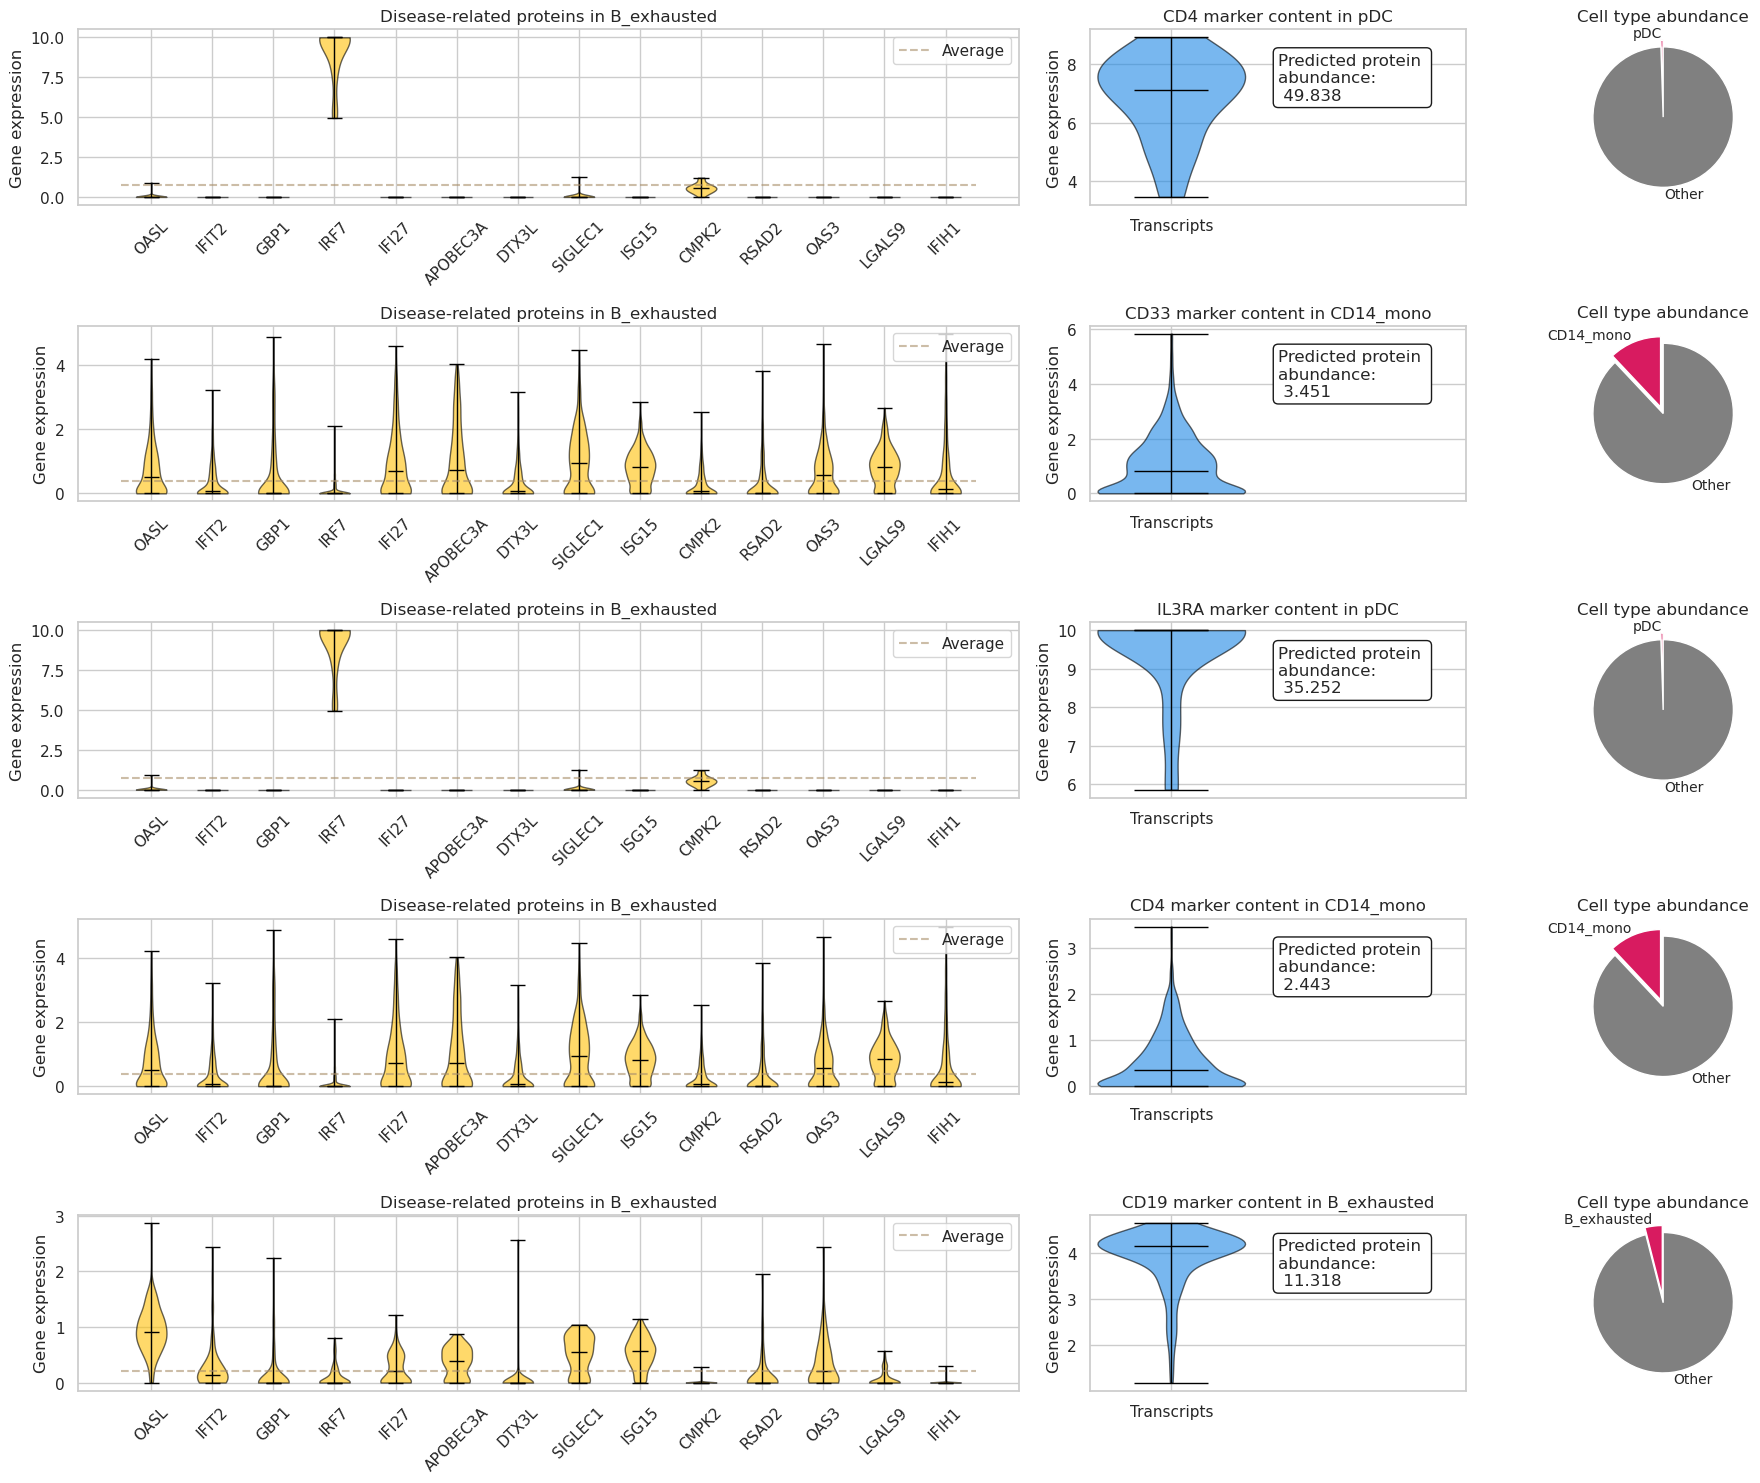

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

only_famous_targets=True
n=5

# Assuming the necessary variables (adata, cellMatrix, cellTypes, surf_markers, etc.) are defined elsewhere

# Get top n scores in averagedMatrix with column and index names
if(only_famous_targets):
    usedMarkers_scoreMatrix=scoreMatrix.loc[:, scoreMatrix.columns.isin(repurposableTargets)].copy()
    top_scores = usedMarkers_scoreMatrix.unstack().sort_values(ascending=False).head(n)
else:
    top_scores = scoreMatrix.unstack().sort_values(ascending=False).head(n)
    
top_info = [(index[1], index[0], value) for index, value in top_scores.items()]

# Display the top n scores with column and index names
print("Top " + str(n) + " Scores for " + str(upregProts) + ":")
fig, axs = plt.subplots(nrows=n, ncols=3, figsize=(18, 3*n), gridspec_kw={'width_ratios': [3, 1.2,0.8]})
i = 0

for cell_t, marker, score in top_info:
    if marker in repurposableTargets:
        repurp = "\tTested for cancer"
    else:
        repurp = ""

    # Get the data to be plotted in the violin plot
    violin_data_1 = [cellMatrix.loc[cellMatrix['cell_type'] == cell_t, prot] for prot in upregProts]
    violin_data_2 = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, marker]

    # Plot the combined violin plot for multiple upregProts
    violin_parts_1 = axs[i, 0].violinplot(violin_data_1, showmedians=True, showextrema=True)
    axs[i, 0].set_xticks(np.arange(1, len(upregProts) + 1))
    axs[i, 0].set_xticklabels(upregProts, rotation=45)
    axs[i, 0].set_title("Disease-related proteins in " + col)
    axs[i, 0].set_ylabel("Gene expression")
    
    axs[i, 0].plot([0.5, len(upregProts)+0.5], [averagedMatrix.loc[cell_t, upregProts].mean(), averagedMatrix.loc[cell_t, upregProts].mean()], linestyle='dashed', color='#AB916D', alpha=0.6, label="Average")
    axs[i, 0].legend()
    # Customize violin plot colors
    for j, pc in enumerate(violin_parts_1['bodies']):
        pc.set_facecolor('#FFC107')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_1[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the second violin plot
    violin_parts_2 = axs[i, 1].violinplot([violin_data_2], showmedians=True, showextrema=True)
    axs[i, 1].set_xticks([1, 2])
    axs[i, 1].set_xticklabels(["Transcripts", ""])
    axs[i, 1].set_title(marker + " marker content in " + cell_t)
    axs[i, 1].set_ylabel("Gene expression")
    
    axs[i, 1].annotate(f"Predicted protein \nabundance:\n{abundanceMatrix.loc[cell_t, marker]: .3f}", xy=(0.5, 0.6), xycoords=axs[i, 1].transAxes, bbox=dict(boxstyle="round", fc="w", edgecolor='k'))

    for pc in violin_parts_2['bodies']:
        pc.set_facecolor('#1E88E5')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_2[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the pie chart
    piechart = axs[i, 2].pie([sums[cellTypes.index(cell_t)], 1 - sums[cellTypes.index(cell_t)]],
                             labels=[cell_t, "Other"], colors=['#D81B60', 'grey'],
                             startangle=90, explode=[0.1, 0],
                             textprops={'size': 'smaller'})
    axs[i, 2].set_title("Cell type abundance")

    print(f"Cell type: {cell_t}, Surface marker: {marker}, Value: {score:.7f}" + repurp)
    i += 1

plt.tight_layout()
plt.show()
fig.savefig(dataset + "_" + upregProt + "_violin.png", bbox_inches='tight')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Example data (replace with your own data)
y_true = upregProts_effective
y_scores = markers_averagedMatrix.loc[:,'CD4'].fillna(0)

# Prediction-Error Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction-Error Plot')

# Residuals Plot
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()


In [ ]:
print(upregProts_effective)
print(markers_averagedMatrix.loc[:,'GAPDH'].fillna(0))

In [ ]:
import zipfile
import os

zipfile_name=dataset+"_Figures.zip"
directory = "/kaggle/working/"  # The directory to search in

# Find the files that contain the search string
files_to_zip = [f for f in os.listdir(directory) if dataset in f and not "zip" in f]

# Create the zip file and add the filtered files
with zipfile.ZipFile(zipfile_name, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), arcname=file)

In [ ]:
#!rm GSM3666108_SC136SSCUP_Figures.zip
